In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

### Task 1: (30% of credit)
#### (1) Consder the dataset 1 below, with two-dimensional observations X classified into 2 categories using vector Y. As you can see from the plot the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are admitted). 
#### a. Report the separating hyperplane (line).
#### b. Calculate the margin.
#### c. List the support vectors.

#### (2) Add the separating line to the plot, visualize the margin and mark the support vectors.

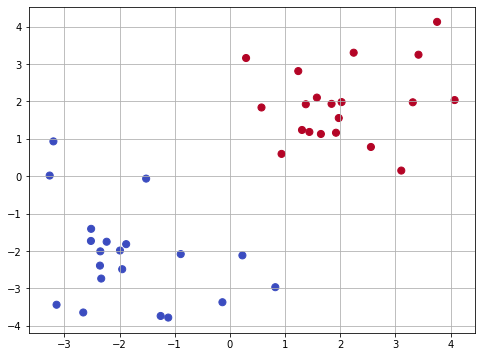

In [2]:
#Data
data1=pd.read_csv('dataset1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
rcParams['figure.figsize'] = 8, 6
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#### Solution:

1.
(a).

In [3]:
from sklearn import svm
clf = svm.SVC(C=100000,kernel='linear')
clf.fit(X,Y)

SVC(C=100000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [4]:
w = clf.coef_
b=clf.intercept_
print("w : ",w)
print("b : ",b)
# Therefore the equation of hyperplane is 0.663.x1+0.564.x2+0.0432=0 

w :  [[0.66329036 0.56359437]]
b :  [0.04319974]


(b).

In [5]:
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
print("margin : ",margin)

margin :  1.1488996752138216


(c).

In [6]:
print('Support vectors:')
clf.support_vectors_

Support vectors:


array([[ 0.22627536, -2.11810965],
       [-1.5180363 , -0.06399383],
       [ 0.93564585,  0.5969359 ]])

2.Plot

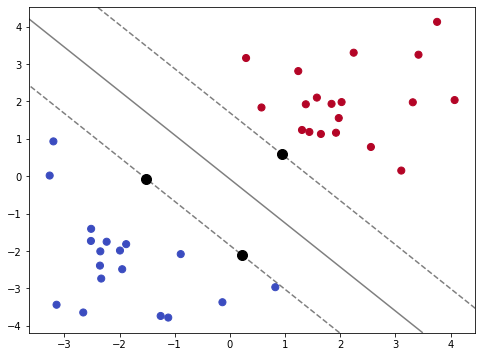

In [7]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, c='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plot_svc_decision_function(clf);

### Task 2 (30% of credit)

#### (1)Train SVM with soft margin on the training subset of the dataset 2 below. First try C=0.01, and visualize the seperation over the training set. Report the in-sample and out-of-sample accuracy acheived by SVM over the training and test sets.

#### (2) Try various regulatization constants C from the sequence below and use the validation subset in order to evaluate perfomance of the classifier. Plot the validation accuracy vs log(C).  
C=[math.exp(i) for i in np.linspace(-10,5,200)]   

#### (3) Select optimal C based on the validation accuracy above and report new out-of-sample accuracy of the classifier over the test set while using this optimal C.


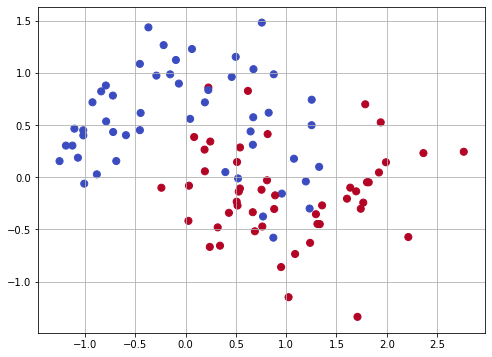

In [8]:
#Data
data2=pd.read_csv('dataset2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

### Solutions:

(1)

in-sample accuracy :  0.43478260869565216
out-of-sample accuracy :  0.3939393939393939


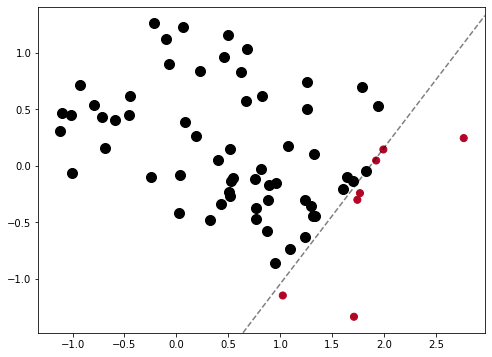

In [9]:
clf2=svm.SVC(C=0.01,kernel='linear')
clf2.fit(X_train,Y_train)

plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], s=50, c=Y_train, cmap=plt.cm.get_cmap('coolwarm', 2))
plot_svc_decision_function(clf2)

print("in-sample accuracy : ",clf2.score(X_vali,Y_vali))
print("out-of-sample accuracy : ",clf2.score(X_test,Y_test))

(2)

#### (For this question people could have different C. Any C that is bigger than 1, is a safe choice. But the corresponding accuracy should be around 0.78.) 

Text(0, 0.5, 'accuracy')

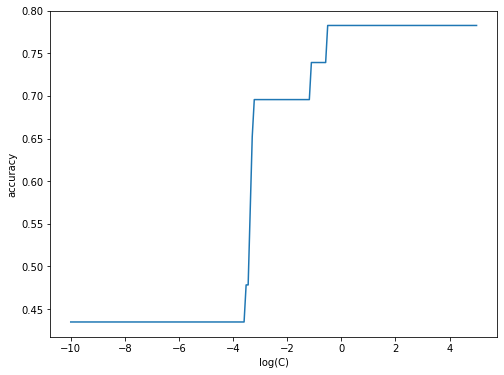

In [10]:
import math
C=[math.exp(i) for i in np.linspace(-10,5,200)]
accuracy=[]
for c in  C:
    model = svm.SVC(kernel='linear', C=c).fit(X_train_1, Y_train_1)
    accuracy.append(model.score(X_vali,Y_vali))

fig,ax=plt.subplots(1,1)
ax.plot(np.log(C),accuracy)
ax.set_xlabel('log(C)')
ax.set_ylabel('accuracy')

(3)

#### (The answer could be different for people who have different optimal C. However it should be around 80 percent.)

In [11]:
from sklearn.model_selection import GridSearchCV
clf3=svm.SVC(kernel='linear')
parameters = {'C': [math.exp(i) for i in np.linspace(-10,5,200)]}
clf3 = GridSearchCV(clf3, parameters, cv=5, n_jobs=8)
clf3.fit(X_train, Y_train)
print(clf3.best_params_)
best_model = clf3.best_estimator_
best_model.score(X_test,Y_test)


{'C': 0.12425403549766334}


0.7878787878787878

### Task 3 (40% of credit)

#### (1) Train polynomial SVM over the training subset of the dataset 3 provided below. Use the default arguments, and plot the seperation result. Report classification accuracy for the training and test sets.

#### (2) Use validation subset in order to pick the optimal parameters for the polynomial model.

(a) Try the degrees 1,2,3,4. For each degree, consider variety of regularization constants from the range

C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]

in order to evaluate the classifier performance over the validation set.

(b) Plot graph "Accuracy vs log(C)" for each degree, and pick optimal degree and regularization constant C based on these graphs. Report your optimal degree and C.

(c) Use optimal degree and regularization constant C to compute and report the final out-of-sample accuracy of the best classification model selected. 


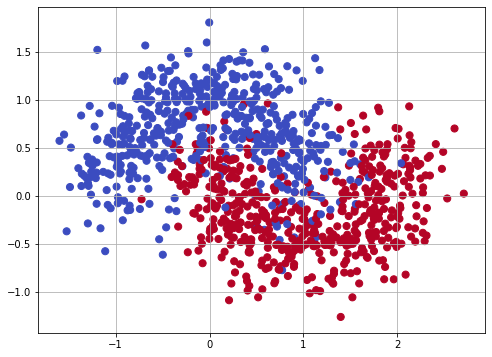

In [12]:
#Data 
data3=pd.read_csv('dataset3.csv')
X=data3.iloc[:,:2]
Y=data3.iloc[:,2]
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments(degree and C)
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

### Solutions

(1)

in-sample accuracy :  0.8738738738738738
out-of-sample accuracy :  0.8666666666666667


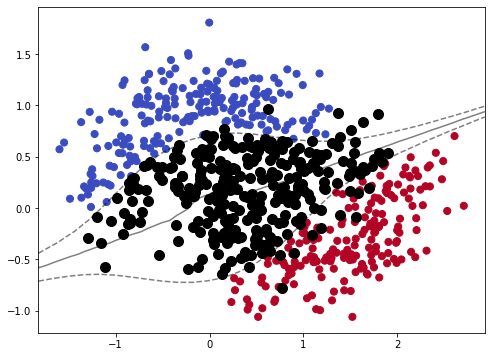

In [13]:
clf=svm.SVC(kernel='poly')
clf.fit(X_train, Y_train)
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], s=50, c=Y_train, cmap=plt.cm.get_cmap('coolwarm', 2))
plot_svc_decision_function(clf)
print("in-sample accuracy : ",clf.score(X_vali,Y_vali))
print("out-of-sample accuracy : ",clf.score(X_test,Y_test))

(2)

#### Look carefully at the plot. Here the accuracy goes down when we increase log(C). If you choose optimal C in the end of the period when C reaches max as we did in class, you could have problems (might not, no garuantee). So you might have your own way of picking the optimal C, but you should have a similar OS result in next question. 

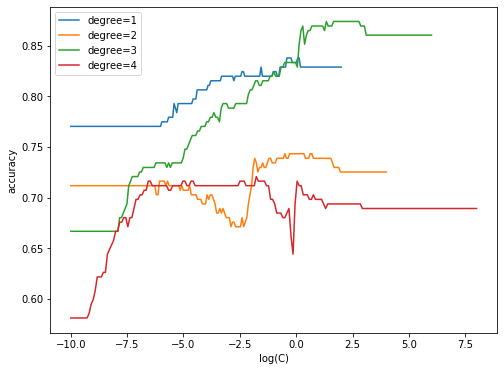

In [14]:
degree=[1,2,3,4]
accuracy=[]
for d in degree:
    C=[math.exp(i) for i in np.linspace(-10,2*d,200)]
    for c in C:
        model = svm.SVC(kernel='poly', degree=d,C=c).fit(X_train_1, Y_train_1)
        accuracy.append(model.score(X_vali,Y_vali))
    plt.plot(np.log(C),accuracy,label='degree={0:.0f}'.format(d))
    plt.xlabel('log(C)')
    plt.ylabel('accuracy')
    plt.legend(loc='best')
    accuracy=[]

In [15]:
# As we can see from the previous question, degree=3 is the optimal degree
clf=svm.SVC(kernel='poly',degree=3)
parameters = {
    'C': [math.exp(i) for i in np.linspace(-10,2*3,200)]}
clf = GridSearchCV(clf, parameters, cv=5, n_jobs=8)
clf.fit(X_train, Y_train)
print("Optimal Parameters:")
print(clf.best_params_)
best_model = clf.best_estimator_
print("Final out-of-sample accuracy : ",best_model.score(X_test,Y_test))

Optimal Parameters:
{'C': 2.3496616916293984}
Final out-of-sample accuracy :  0.8818181818181818
